In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SW_functions as sw
import matplotlib.animation as animation
from IPython.display import HTML
import Observables_functions as obs
import errors as error

In [2]:
import sys
sys.setrecursionlimit(10000000)

# Swedensen-Wang algorithm

### Relaxation

In [ ]:
%%time
fig = plt.figure(figsize=(8,8))

L = 30
#spins0 = 2*np.pi*np.ones((L,L))
spins0 = 2*np.pi*np.random.rand(L,L)
spins = sw.get_vector_components(spins0).T
random_vector = sw.get_vector_components(2*np.pi*np.random.rand())

ims = []
new_T = 100

for i in range(50):
    spins, _ = sw.sw_evolution(spins, T=new_T)
    spins_angle = np.arctan(spins[:,:,1]/spins[:,:,0])-np.pi
    X, Y = np.mgrid[0:L, 0:L]
    U = spins[:,:,0]
    V = spins[:,:,1]
    #ims.append([plt.quiver(X,Y,U,V)])
    #ims.append([plt.imshow(spins_angle)])
    quiver = plt.quiver(X,Y,U,V)
    imsh = plt.imshow(spins_angle)
    ims.append([quiver,imsh,plt.title('Relaxations step: '+str(i)),])
    if i==5:
        new_T = 0.5

In [3]:
%matplotlib inline
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True,
                                repeat_delay=1)
HTML(ani.to_html5_video())

## Phase transition

### Magnetization

In [3]:
def sw_algorithm(L,t_i,t_f,t_s,t_relax,t_wait):
    
    spins0 = 2*np.pi*np.ones((L,L))
    #spins0 = 2*np.pi*np.random.rand(L,L)
    spins = sw.get_vector_components(spins0).T
    ts = np.linspace(t_i,t_f,t_s)
    ims = []
    m = []
    en = []
    en2 = []
    for t in ts:
        mag_i = []
        en_i = []
        en2_i = []
        for i in range(t_relax):
            spins, _ = sw.sw_evolution(spins, T=t)
        for j  in range(t_wait):
            spins, _ = sw.sw_evolution(spins, T=t)
            mag = np.sum(spins[:,:,0])**2+np.sum(spins[:,:,1])**2
            mag_i.append(mag/len(spins)**4)
            en_i.append(obs.get_energy(L=L, lattice=spins, J=1))
            en2_i.append(obs.get_energy(L=L, lattice=spins, J=1)**2)
        m.append(mag_i)
        en.append(en_i)
        en2.append(en2_i)
        spins_angle = np.arctan2(spins[:,:,0],spins[:,:,1])
        ims.append([plt.imshow(spins_angle)])
    return m, en, en2, ims, spins

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/SW_functions.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  p =  1-np.exp(-2*projection/T)
/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/SW_functions.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  p =  1-np.exp(-2*projection/T)


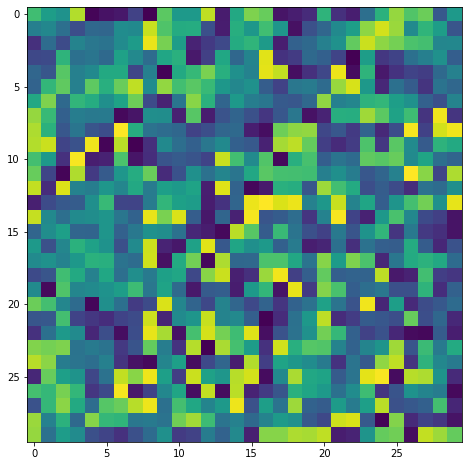

In [4]:
fig = plt.figure(figsize=(8,8))
m, en, en2, ims, spins = sw_algorithm(L=30,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)

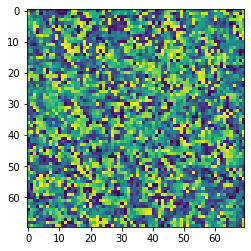

In [79]:
m_30, en_30, en2_30, _, _ = sw_algorithm(L=30,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)
m_50, en_50, en2_50, _, _ = sw_algorithm(L=50,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)
m_70, en_70, en2_70, _, _ = sw_algorithm(L=70,t_i=0,t_f=2,t_s=30,t_relax=10,t_wait=8)

In [99]:
ls = [30,50,70]

In [ ]:
%matplotlib inline
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True,
                                repeat_delay=1)
HTML(ani.to_html5_video())

In [84]:
x=np.linspace(0,2,len(np.mean(m,axis=1)))

In [130]:
m_errors_30 = np.nan_to_num([error.get_error_observable(m_30[i]) for i in range(len(m_30))])
m_errors_50 = np.nan_to_num([error.get_error_observable(m_50[i]) for i in range(len(m_50))])
m_errors_70 = np.nan_to_num([error.get_error_observable(m_70[i]) for i in range(len(m_70))])

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/errors.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)
/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/errors.py:35: RuntimeWarning: invalid value encountered in sqrt
  sigma_A_n = np.sqrt((N-time)*np.sum(A_nn**2)-(np.sum(A_nn)**2))
/home/juandaanieel/bin/anaconda3/envs/qiskit/lib/python3.8/site-packages/scipy/optimize/minpack.py:787: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/home/juandaanieel/bin/anaconda3/envs/qiskit/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/errors.py:113: RuntimeWarning: invali

(0.0, 1.05)

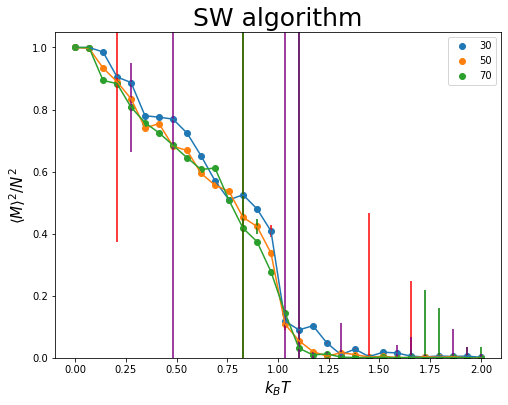

In [131]:
fig = plt.figure(figsize=(8,6))
plt.errorbar(x,np.mean(m_30,axis=1),yerr=m_errors_30,ecolor='red')
plt.scatter(x,np.mean(m_30,axis=1))
plt.errorbar(x,np.mean(m_50,axis=1),yerr=m_errors_50,ecolor='green')
plt.scatter(x,np.mean(m_50,axis=1))
plt.errorbar(x,np.mean(m_70,axis=1),yerr=m_errors_70,ecolor='purple')
plt.scatter(x,np.mean(m_70,axis=1))
plt.legend(ls)
plt.title(r'SW algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M\rangle^2/N^2$',size=15)
plt.ylim(0,1.05)

In [10]:
m_errors[np.array(m_errors)>0.5] = 0

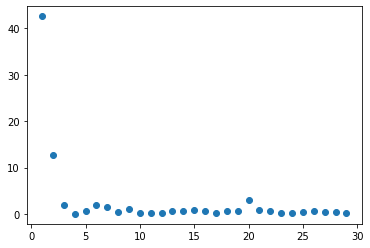

In [129]:
plt.scatter(range(len(cv_50)),cv_50)

In [120]:
cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*x**2))
cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((30**2*x**2))
cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((30**2*x**2))

<ipython-input-120-6bde30e95cc8>:1: RuntimeWarning: invalid value encountered in true_divide
  cv_30 = (np.mean(en2_30,axis=1)-np.mean(np.array(en_30),axis=1)**2)/((30**2*x**2))
<ipython-input-120-6bde30e95cc8>:2: RuntimeWarning: invalid value encountered in true_divide
  cv_50 = (np.mean(en2_50,axis=1)-np.mean(np.array(en_50),axis=1)**2)/((30**2*x**2))
<ipython-input-120-6bde30e95cc8>:3: RuntimeWarning: invalid value encountered in true_divide
  cv_70 = (np.mean(en2_70,axis=1)-np.mean(np.array(en_70),axis=1)**2)/((30**2*x**2))


In [152]:
temp_cv_30, cv_blocked_30, error_cv_30, _, _ = error.get_error_block(obs=cv_30,T_i=0,T_f=2,size=20,tau=15)
temp_cv_50, cv_blocked_50, error_cv_50, _, _ = error.get_error_block(obs=cv_50,T_i=0,T_f=2,size=20,tau=15)
temp_cv_70, cv_blocked_70, error_cv_70, _, _ = error.get_error_block(obs=cv_70,T_i=0,T_f=2,size=20,tau=15)

Text(0, 0.5, '$C_v$')

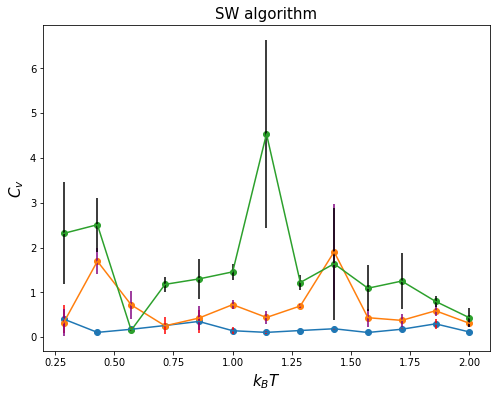

In [158]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_cv_30[2:],cv_blocked_30[2:])
plt.errorbar(temp_cv_30[2:],cv_blocked_30[2:],yerr=error_cv_30[2:],ecolor='red')
plt.scatter(temp_cv_50[2:],cv_blocked_50[2:])
plt.errorbar(temp_cv_50[2:],cv_blocked_50[2:],yerr=error_cv_50[2:],ecolor='purple')
plt.scatter(temp_cv_70[2:],cv_blocked_70[2:])
plt.errorbar(temp_cv_70[2:],cv_blocked_70[2:],yerr=error_cv_70[2:],ecolor='black')
plt.title(r'SW algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$C_v$',size=15)

In [103]:
temp, cv_blocked, error_cv, tau_, error_tau = error.get_error_block(obs=cv,T_i=0,T_f=2,size=10)

In [111]:
temp_m_30, m_30_blocked, error_m_30, tau_, error_tau = error.get_error_block(obs=np.mean(m_30,axis=1),T_i=0,T_f=2,size=10)
temp_m_50, m_50_blocked, error_m_50, tau_, error_tau = error.get_error_block(obs=np.mean(m_50,axis=1),T_i=0,T_f=2,size=10)
temp_m_70, m_70_blocked, error_m_70, tau_, error_tau = error.get_error_block(obs=np.mean(m_70,axis=1),T_i=0,T_f=2,size=10)

/home/juandaanieel/c/TUDelft/AP_master/semester2/CP/project_3/Project-3_kwo/errors.py:37: RuntimeWarning: invalid value encountered in double_scalars
  autocorrelation = ((N-time)*np.sum(A_n*A_nt)-np.sum(A_n)*np.sum(A_nt))/(sigma_A_n*sigma_A_nt)


In [108]:
m_30_blocked

array([0.99994997, 0.94528352, 0.83358111, 0.77247905, 0.68801817,
       0.54016615, 0.50322329, 0.26401392, 0.09751563, 0.02979023,
       0.01688105, 0.01779926, 0.00498128, 0.00604686, 0.00447924,
       0.        , 0.        ])

In [109]:
error_m_30

array([5.00287791e-05, 4.02641852e-02, 5.34744727e-02, 3.15277740e-03,
       3.64924171e-02, 3.07511833e-02, 2.25811687e-02, 1.44900714e-01,
       6.76223762e-03, 1.86681769e-02, 1.20970128e-02, 1.07236404e-03,
       1.19057501e-03, 7.36615010e-04, 1.96602163e-03, 0.00000000e+00,
       0.00000000e+00])

(0.0, 1.05)

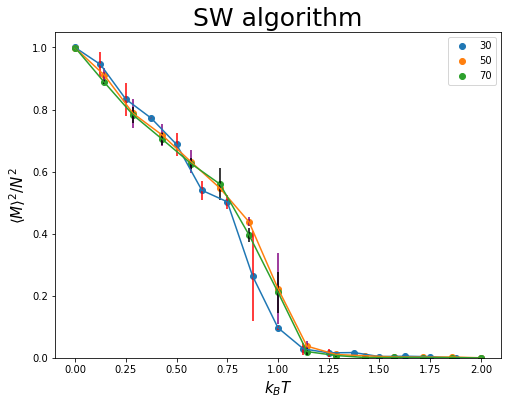

In [118]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_m_30,m_30_blocked)
plt.errorbar(temp_m_30,m_30_blocked,yerr=error_m_30,ecolor='red')
plt.scatter(temp_m_50,m_50_blocked)
plt.errorbar(temp_m_50,m_50_blocked,yerr=error_m_50,ecolor='purple')
plt.scatter(temp_m_70,m_70_blocked)
plt.errorbar(temp_m_70,m_70_blocked,yerr=error_m_70,ecolor='black')
plt.legend(ls)
plt.title(r'SW algorithm',size=25)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\langle M\rangle^2/N^2$',size=15)
plt.ylim(0,1.05)

In [171]:
sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/x)
sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/x)
sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/x)

<ipython-input-171-99b6082b5094>:1: RuntimeWarning: invalid value encountered in true_divide
  sus_30 = np.nan_to_num((np.mean(m_30,axis=1)-np.mean(np.sqrt(m_30),axis=1)**2)*30**2/x)
<ipython-input-171-99b6082b5094>:2: RuntimeWarning: divide by zero encountered in true_divide
  sus_50 = np.nan_to_num((np.mean(m_50,axis=1)-np.mean(np.sqrt(m_50),axis=1)**2)*50**2/x)
<ipython-input-171-99b6082b5094>:3: RuntimeWarning: divide by zero encountered in true_divide
  sus_70 = np.nan_to_num((np.mean(m_70,axis=1)-np.mean(np.sqrt(m_70),axis=1)**2)*70**2/x)


In [185]:
temp_sus_30, sus_30_blocked, error_sus_30, _, _ = error.get_error_block(obs=sus_30,T_i=0,T_f=2,size=10,tau=15)
temp_sus_50, sus_50_blocked, error_sus_50, _, _ = error.get_error_block(obs=sus_50,T_i=0,T_f=2,size=10,tau=15)
temp_sus_70, sus_70_blocked, error_sus_70, _, _ = error.get_error_block(obs=sus_70,T_i=0,T_f=2,size=10,tau=15)

(0.0, 25.0)

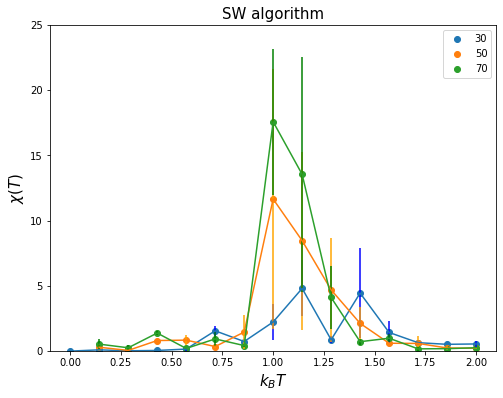

In [188]:
fig = plt.figure(figsize=(8,6))
plt.scatter(temp_sus_30,sus_30_blocked)
plt.errorbar(temp_sus_30,sus_30_blocked,yerr=error_sus_30,ecolor='blue')
plt.scatter(temp_sus_50,sus_50_blocked)
plt.errorbar(temp_sus_50,sus_50_blocked,yerr=error_sus_50,ecolor='orange')
plt.scatter(temp_sus_70,sus_70_blocked)
plt.errorbar(temp_sus_70,sus_70_blocked,yerr=error_sus_70,ecolor='green')
plt.legend(ls)
plt.title(r'SW algorithm',size=15)
plt.xlabel(r'$k_B T$',size=15)
plt.ylabel(r'$\chi(T)$',size=15)
plt.ylim(0,25)